In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/emirates"
pages = 23
page_size = 100

reviews = []

In [ ]:
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I flew the same route last yea...
1,✅ Trip Verified | First time i have lost my b...
2,✅ Trip Verified | My Emirates experience was ...
3,✅ Trip Verified | This was my first trip on Em...
4,✅ Trip Verified | Check in desk at Montreal ai...


In [ ]:
df.to_csv("e_reviews.csv", index = False)

In [ ]:
reviews = pd.read_csv("e_reviews.csv")

In [ ]:
reviews.head()

,reviews
0,Not Verified | I flew the same route last yea...
1,✅ Trip Verified | First time i have lost my b...
2,✅ Trip Verified | My Emirates experience was ...
3,✅ Trip Verified | This was my first trip on Em...
4,✅ Trip Verified | Check in desk at Montreal ai...


In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
reviews['reviews'] = reviews['reviews'].astype(str)

In [ ]:
reviews['reviews'] = reviews['reviews'].str.replace('Trip Verified |', '')
reviews['reviews'] = reviews['reviews'].str.replace('Not Verified |', '')
reviews['reviews'] = reviews['reviews'].str.replace('✅', '')
reviews['reviews'] = reviews['reviews'].str.replace('|', '')

<ipython-input-12-735f7a7dcf22>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['reviews'] = reviews['reviews'].str.replace('Trip Verified |', '')
<ipython-input-12-735f7a7dcf22>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['reviews'] = reviews['reviews'].str.replace('Not Verified |', '')
<ipython-input-12-735f7a7dcf22>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviews['reviews'] = reviews['reviews'].str.replace('|', '')


In [ ]:
reviews['reviews'] = reviews['reviews'].apply(remove_punctuations)

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['reviews']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['reviews']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['reviews']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['reviews']]

In [ ]:

reviews.head()

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='compound', y='reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='neg', y='reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='neu', y='reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

,reviews,compound,neg,neu,pos,processed_review
0,I flew the same route last year and it is ob...,0.7351,0.043,0.791,0.166,"[flew, rout, last, year, obviou, emir, use, ol..."
1,First time i have lost my baggage after arr...,-0.9509,0.103,0.851,0.046,"[first, time, lost, baggag, arriv, help, next,..."
2,My Emirates experience was horrific startin...,-0.9885,0.255,0.711,0.034,"[emir, experi, horrif, start, delhi, airport, ..."
3,This was my first trip on Emirates I paid 14...,0.9477,0.041,0.880,0.079,"[first, trip, emir, paid, 1400, economi, ticke..."
4,Check in desk at Montreal airport going to P...,-0.8075,0.074,0.884,0.042,"[check, desk, montreal, airport, go, philippin..."


In [ ]:
reviews[['compound','neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,2300.000000,2300.000000,2300.000000,2300.000000
mean,0.221419,0.071397,0.804690,0.123921
std,0.783456,0.055205,0.081324,0.093683
min,-0.997800,0.000000,0.445000,0.000000
25%,-0.689575,0.030000,0.758000,0.054000
50%,0.659350,0.066500,0.814000,0.102000
75%,0.948850,0.102000,0.862000,0.177000
max,0.998300,0.365000,1.000000,0.555000


In [ ]:
num_pos = (reviews['compound']>=0).sum()
num_pos_df = pd.DataFrame({'Number of positive reviews': [num_pos]})
num_pos_df

,Number of positive reviews
0,1412


In [ ]:
perc_pos = (reviews['compound']>=0).sum()/reviews['reviews'].count()*100
perc_pos_df = pd.DataFrame({'% positive reviews': [perc_pos]})
perc_pos_df


,% positive reviews
0,61.391304


In [ ]:
num_neg = (reviews['compound']<=0).sum()
num_neg_df = pd.DataFrame({'Number of Negative reviews': [num_neg]})
num_neg_df

,Number of Negative reviews
0,898


In [ ]:
perc_neg = (reviews['compound']<=0).sum()/reviews['reviews'].count()*100
perc_neg_df = pd.DataFrame({'% Negative reviews': [perc_neg]})
perc_neg_df

,% Negative reviews
0,39.043478


<Axes: xlabel='compound', ylabel='Count'>

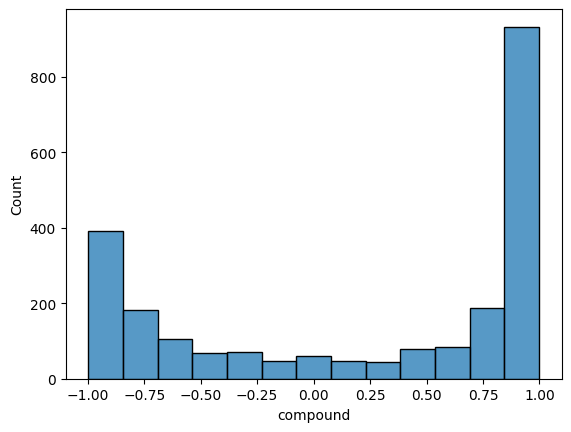

In [ ]:
sns.histplot(reviews['compound'])

<Axes: xlabel='pos', ylabel='Count'>

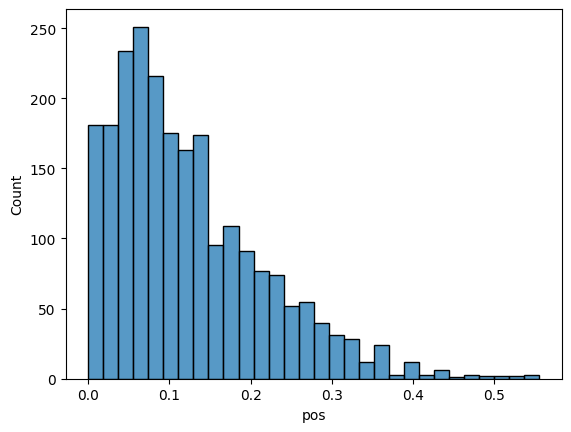

In [ ]:
sns.histplot(reviews['pos'])

<Axes: xlabel='neg', ylabel='Count'>

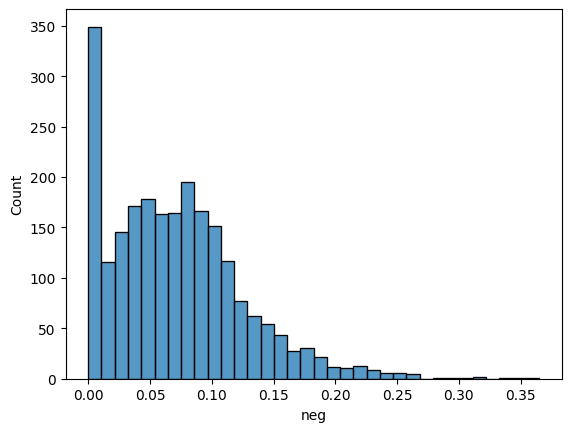

In [ ]:
sns.histplot(reviews['neg'])

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dfreviews = reviews
dfreviews['processed_review'] = reviews['reviews'].apply(preprocess_text)
positive_reviews = dfreviews.loc[(dfreviews['compound']>0),:]
negative_reviews = dfreviews.loc[(dfreviews['compound']<0),:]

In [ ]:
pos_tokens = [word for Review in positive_reviews['processed_review'] for word in Review]
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

flight   emir  dubai   seat servic   food   good   time   crew  class 
  2623   1911   1642   1524   1304   1079   1057   1020    953    785 


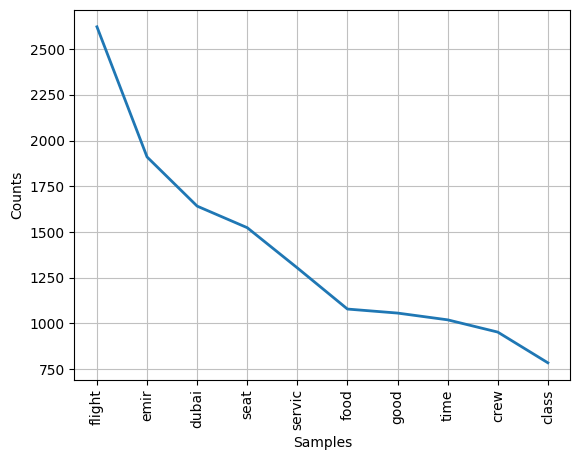

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
pos_freqdist.plot(10)

In [ ]:

neg_tokens = [word for Review in negative_reviews['processed_review'] for word in Review]
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

flight   emir  dubai   seat servic   hour   time airlin  staff    one 
  2100   1583   1198    941    891    703    677    556    547    460 


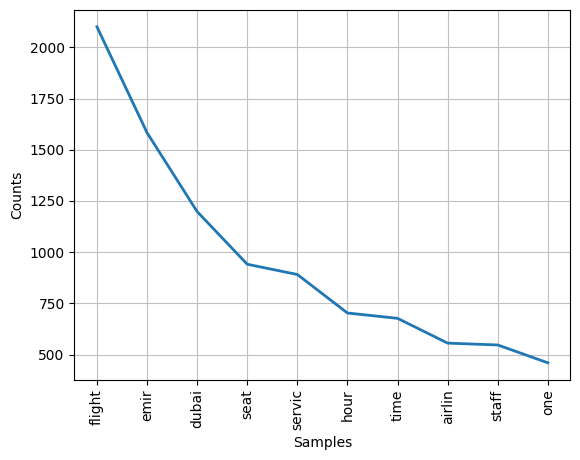

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
neg_freqdist.plot(10)

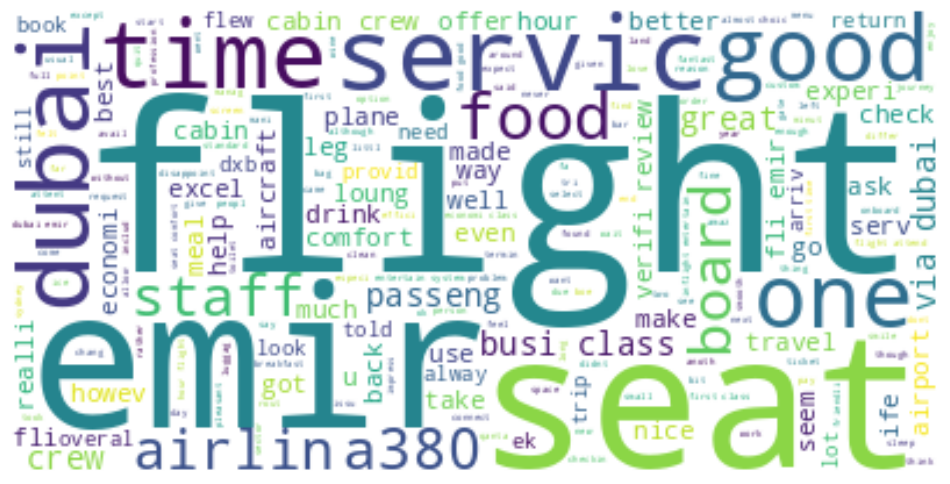

In [ ]:
from wordcloud import WordCloud
wordcloudpos = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wordcloudpos, interpolation='bilinear')
plt.axis('off')
plt.show()

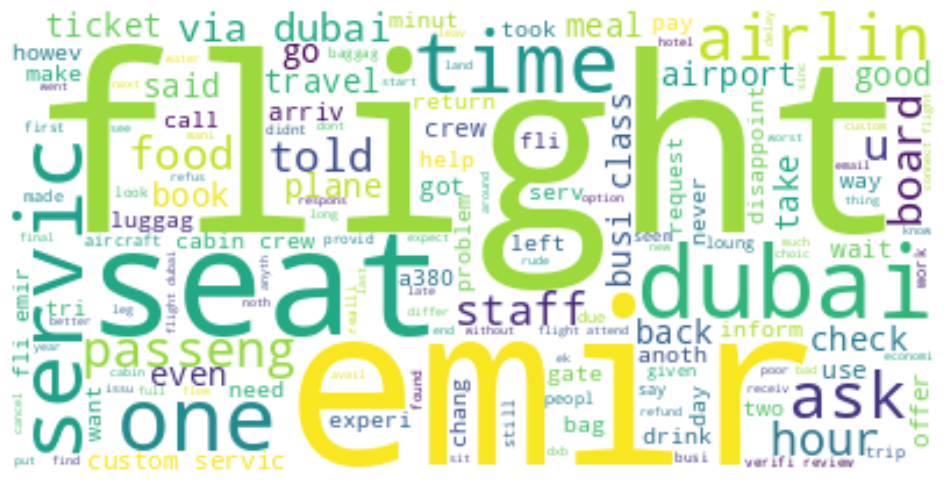

In [ ]:
wordcloudneg = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wordcloudneg, interpolation='bilinear')
plt.axis('off')
plt.show()